<a href="https://colab.research.google.com/github/fatihdursunfd/machine_learning/blob/fd/k_mean_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
#Generate dataset
X, _ = make_blobs(n_samples=1000, n_features=2, cluster_std=7.5, random_state=61)

In [ ]:
#split data 
from sklearn.model_selection import train_test_split 

X_train, X_test, _, _ = train_test_split(X, _, test_size=0.2, random_state=42)

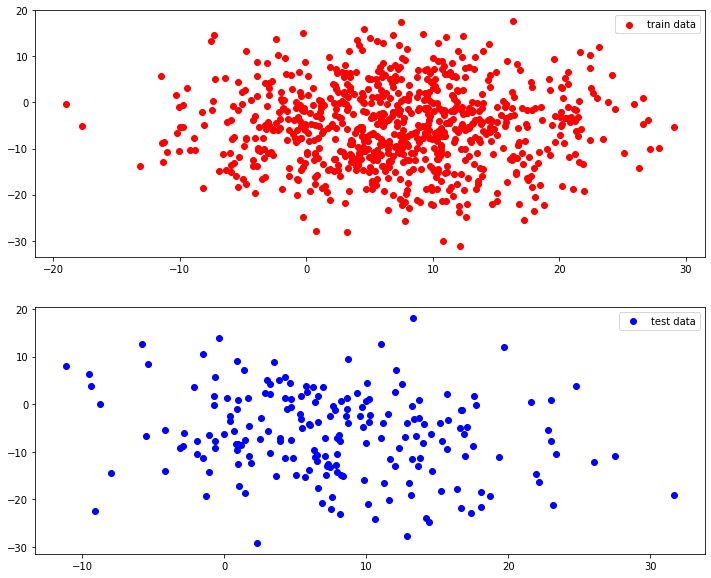

In [ ]:
#plot train and test data
fig, axs = plt.subplots(2 , figsize=(12,10))

axs[0].scatter(X_train.T[0],X_train.T[1],color="r",label="train data")
axs[1].scatter(X_test.T[0],X_test.T[1],color="b",label="test data")
axs[0].legend()
axs[1].legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


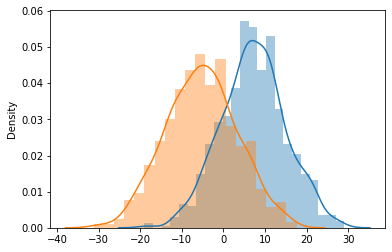

In [ ]:
sns.distplot(X_train.T[0])
sns.distplot(X_train.T[1])

In [ ]:
#standartization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

In [ ]:
#training
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5 , random_state=61)
model.fit(X_train_n)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=61, tol=0.0001, verbose=0)

In [ ]:
clusters = model.predict(X_train_n)

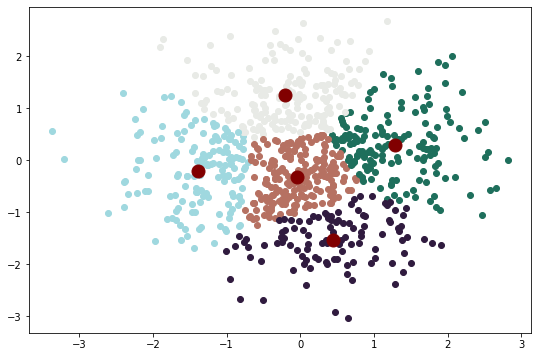

In [ ]:
Colors = ["#1e6f5c" , "#301b3f" , "#b67162" , "#9fd8df" , "#e8eae6"]

plt.figure(figsize=(9,6))
for i in range(len(X_train_n)):
  plt.scatter(X_train_n.T[0][i] , X_train_n.T[1][i] , color = Colors[clusters[i]])

for i in range(len(model.cluster_centers_)):
  plt.plot(model.cluster_centers_[i][0], model.cluster_centers_[i][1], color='#810000',marker="o",markersize=13)

plt.show()

In [ ]:
#testing
clusters = model.predict(X_test_n)

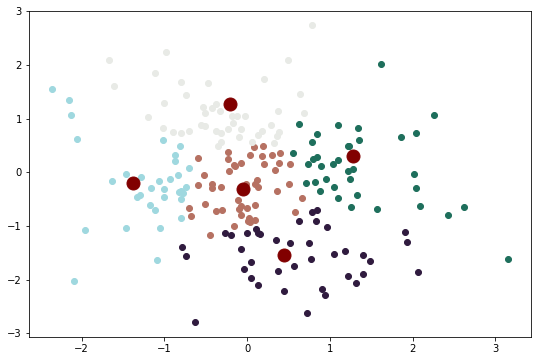

In [ ]:
# predicted test data

plt.figure(figsize=(9,6))
for i in range(len(X_test_n)):
  plt.scatter(X_test_n.T[0][i] , X_test_n.T[1][i] , color = Colors[clusters[i]])

for i in range(len(model.cluster_centers_)):
  plt.plot(model.cluster_centers_[i][0], model.cluster_centers_[i][1], color='#810000',marker="o",markersize=13)

plt.show()